<a href="https://colab.research.google.com/github/ArpanSM/MachineLearningHackathons/blob/master/MachineHach_Used_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load data

In [ ]:
train = "/content/drive/My Drive/Work/Datasets/Participants_Data_Used_Cars/Data_Train.xlsx"
import pandas as pd
df = pd.read_excel(train)

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
test = "/content/drive/My Drive/Work/Datasets/Participants_Data_Used_Cars/Data_Test.xlsx"
dftest = pd.read_excel(test)
dftest.shape

(1234, 12)

In [ ]:
s = '/content/drive/My Drive/Work/Datasets/Participants_Data_Used_Cars/Sample_submission.xlsx'
sub = pd.read_excel(s)
sub.shape

(1234, 1)

# Cleaning and Preprocessing

In [ ]:
print(df.isnull().sum())
print("-------------------------------")
print(dftest.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
-------------------------------
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64


In [ ]:
del df['New_Price']
del dftest['New_Price']
del df['Name']
del dftest['Name']
del df['Location']
del dftest['Location']
print(df.isnull().sum())
print("-------------------------------")
print(dftest.isnull().sum())
print(dftest.shape)

Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64
-------------------------------
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64
(1234, 9)


In [ ]:
#train
df['Power'] = df.Power.str.extract('^([-\d\.,\s]+)')
df['Power'] = df['Power'].astype('float64')
df['Engine'] = df.Engine.str.extract('^([-\d\.,\s]+)')
df['Engine'] = df['Engine'].astype('float64')
df['Mileage'] = df.Mileage.str.extract('^([-\d\.,\s]+)')
df['Mileage'] = df['Mileage'].astype('float64')
#test
dftest['Power'] = dftest.Power.str.extract('^([-\d\.,\s]+)')
dftest['Power'] = dftest['Power'].astype('float64')
dftest['Engine'] = dftest.Engine.str.extract('^([-\d\.,\s]+)')
dftest['Engine'] = dftest['Engine'].astype('float64')
dftest['Mileage'] = dftest.Mileage.str.extract('^([-\d\.,\s]+)')
dftest['Mileage'] = dftest['Mileage'].astype('float64')
#train
df = df[df.Mileage != 0]
df = df[df.Seats != 0]
df = df[df.Power != 0]
df = df[df.Engine != 0]
df = df[df.Price != 0]
print(df.isnull().sum())
print("-------------------------------")
print(dftest.isnull().sum())
print(dftest.shape)

Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                25
Power                103
Seats                 30
Price                  0
dtype: int64
-------------------------------
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                32
Seats                11
dtype: int64
(1234, 9)


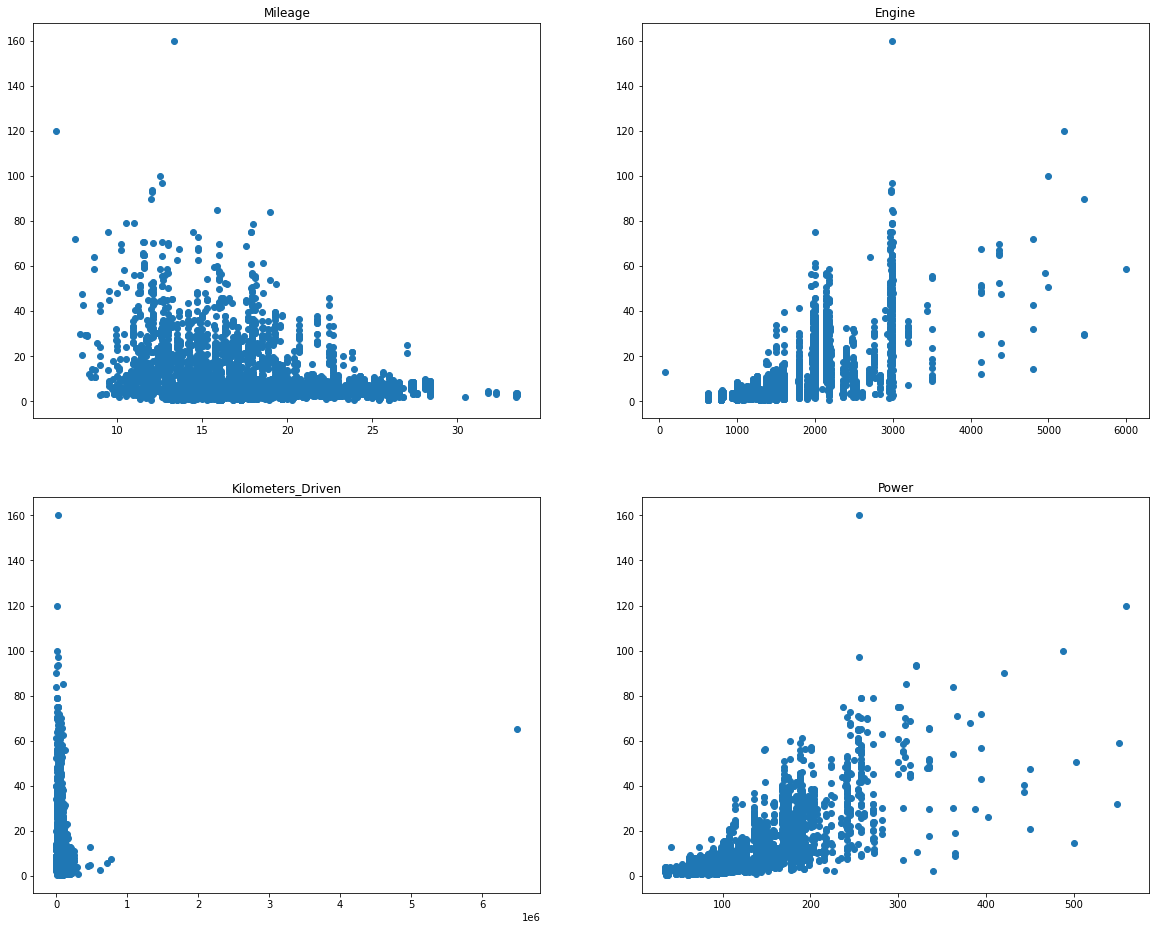

In [ ]:
import matplotlib.pyplot as plt
fig, ax  = plt.subplots(nrows=2,ncols=2,figsize=(20,16))
#fig.set_facecolor('xkcd:salmon')
ax[0,0].scatter(df['Mileage'],df['Price'])
ax[0,1].scatter(df['Engine'],df['Price'])
ax[1,0].scatter(df['Kilometers_Driven'],df['Price'])
ax[1,1].scatter(df['Power'],df['Price'])
ax[0,0].set_title('Mileage')
ax[0,1].set_title('Engine')
ax[1,0].set_title('Kilometers_Driven')
ax[1,1].set_title('Power')
plt.show()

In [ ]:
df = df.drop(df[(df['Mileage']<10) & (df['Price']>100)].index).reset_index(drop=True)
df = df.drop(df[(df['Power']<300) & (df['Price']>140)].index).reset_index(drop=True)
df = df.drop(df[(df['Kilometers_Driven']>60000)].index).reset_index(drop=True)
df = df.drop(df[(df['Power']>450)].index).reset_index(drop=True)
df = df.drop(df[(df['Engine']>5000)].index).reset_index(drop=True)

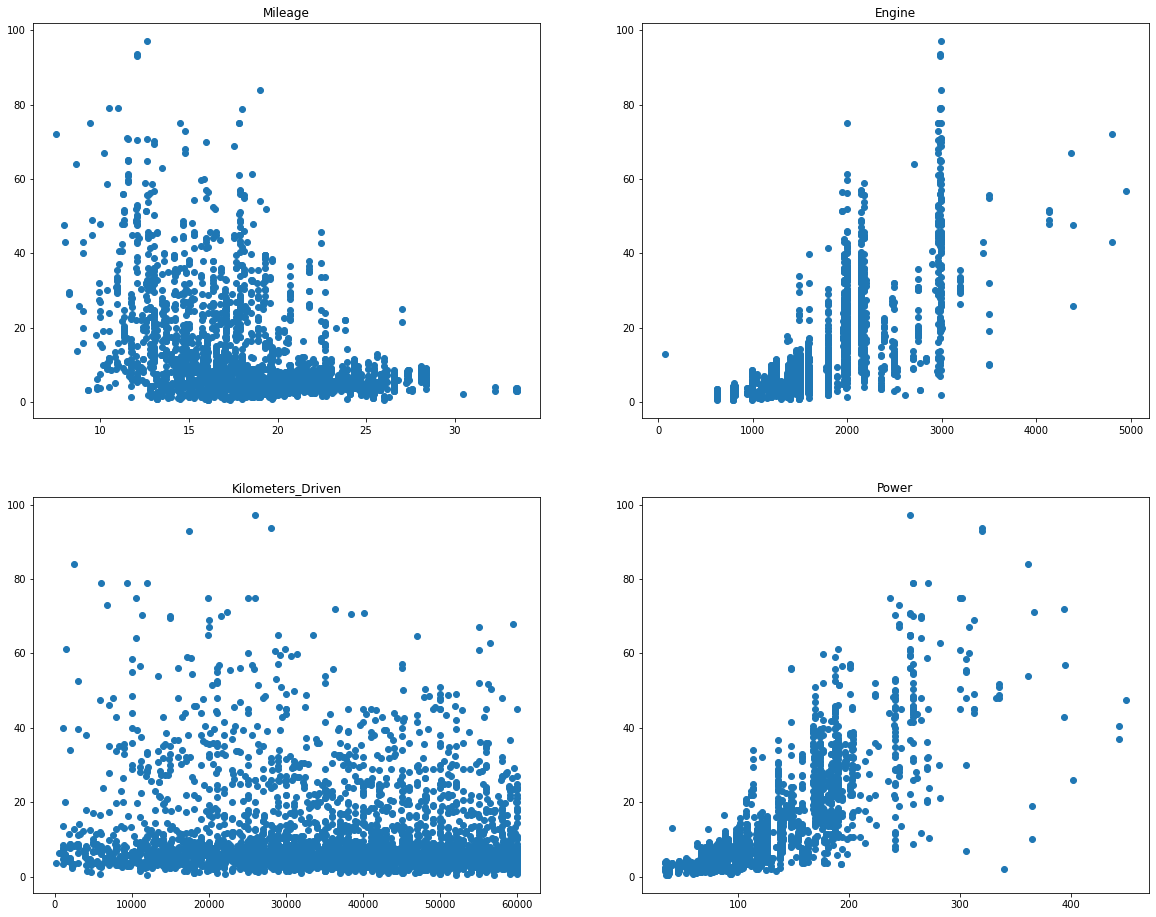

In [ ]:
fig, ax  = plt.subplots(nrows=2,ncols=2,figsize=(20,16))
ax[0,0].scatter(df['Mileage'],df['Price'])
ax[0,1].scatter(df['Engine'],df['Price'])
ax[1,0].scatter(df['Kilometers_Driven'],df['Price'])
ax[1,1].scatter(df['Power'],df['Price'])
ax[0,0].set_title('Mileage')
ax[0,1].set_title('Engine')
ax[1,0].set_title('Kilometers_Driven')
ax[1,1].set_title('Power')
plt.show()

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
df.describe(include = 'all')

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,3529.000000,3529.000000,3529,3529,3529,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000
unique,NaN,NaN,4,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1894,2379,3130,NaN,NaN,NaN,NaN,NaN
mean,2014.590819,36420.135449,NaN,NaN,NaN,18.748850,1550.574384,112.644795,5.176254,10.910298
std,2.655116,15233.810474,NaN,NaN,NaN,3.974467,558.077827,53.635686,0.674354,12.231428
min,1998.000000,171.000000,NaN,NaN,NaN,7.500000,624.000000,34.200000,2.000000,0.450000
25%,2013.000000,25000.000000,NaN,NaN,NaN,16.200000,1197.000000,78.900000,5.000000,3.950000
50%,2015.000000,37822.000000,NaN,NaN,NaN,18.600000,1396.000000,88.800000,5.000000,6.200000
75%,2017.000000,49663.000000,NaN,NaN,NaN,21.190000,1968.000000,138.020000,5.000000,11.560000


In [ ]:
#test
dftest['Engine'] = dftest['Engine'].fillna((dftest['Engine'].mean()))
dftest['Power'] = dftest['Power'].fillna((dftest['Power'].mean()))
dftest['Seats'] = dftest['Seats'].fillna((dftest['Seats'].mean()))
mean_mileage = dftest['Mileage'].mean(skipna=True)
dftest['Mileage']=dftest.Mileage.mask(dftest.Mileage==0,mean_mileage)
print(dftest.isnull().sum())
print(dftest.shape)

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64
(1234, 9)


In [ ]:
dftest.describe(include='all')

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
count,1234.000000,1234.000000,1234,1234,1234,1234.000000,1234.000000,1234.000000,1234.000000
unique,NaN,NaN,4,2,4,NaN,NaN,NaN,NaN
top,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN
freq,NaN,NaN,647,905,1023,NaN,NaN,NaN,NaN
mean,2013.400324,58507.288493,NaN,NaN,NaN,18.365316,1593.584967,110.380420,5.284546
std,3.179700,35598.702098,NaN,NaN,NaN,4.051387,562.054549,50.870564,0.821931
min,1996.000000,1000.000000,NaN,NaN,NaN,7.940000,624.000000,34.200000,2.000000
25%,2011.000000,34000.000000,NaN,NaN,NaN,15.400000,1198.000000,76.200000,5.000000
50%,2014.000000,54572.500000,NaN,NaN,NaN,18.250000,1461.000000,98.600000,5.000000
75%,2016.000000,75000.000000,NaN,NaN,NaN,21.100000,1968.000000,126.300000,5.000000


# Box Plot

In [ ]:
import matplotlib.pyplot as plt
fig, ax  = plt.subplots(nrows=2,ncols=3,figsize=(20,16))
ax[0,0].boxplot(df['Mileage'])
ax[0,1].boxplot(df['Engine'])
ax[0,2].boxplot(df['Kilometers_Driven'])
ax[1,0].boxplot(df['Power'])
ax[1,1].boxplot(df['Price'])
ax[0,0].set_title('Mileage')
ax[0,1].set_title('Engine')
ax[0,2].set_title('Kilometers_Driven')
ax[1,0].set_title('Power')
ax[1,1].set_title('Price')
plt.show()

In [ ]:
i = df[df.Kilometers_Driven == 6.500000e+06].index
df.drop(i,inplace=True)
i = df[df.Price == 160.000000].index
df.drop(i,inplace=True)
i = df[df.Price == 120.000000].index
df.drop(i,inplace=True)

# Target Variable

In [ ]:
from scipy import stats
from scipy.stats import norm, skew 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')


 mu = 10.91 and sigma = 12.23



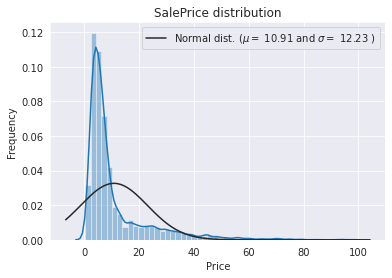

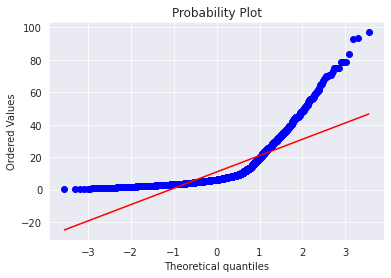

In [ ]:
sns.distplot(df['Price'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show()


 mu = 2.14 and sigma = 0.76



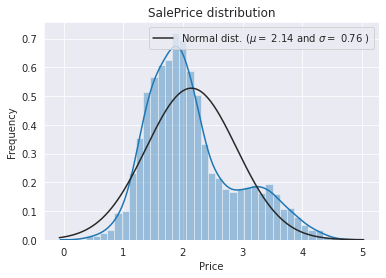

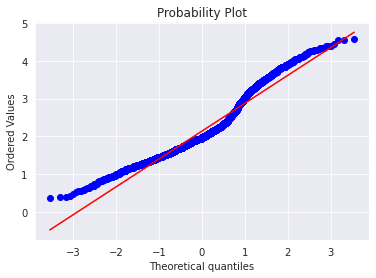

In [ ]:
import numpy as np
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["Price"] = np.log1p(df["Price"])
sns.distplot(df['Price'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed.

# Correlation Map

In [ ]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio


# Scaling

## Train

In [ ]:
#Robust Scaling
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
#Kilometers_Driven
df['Robust_KD']=robust.fit_transform(df.Kilometers_Driven.values.reshape(-1, 1))
#Engine
df['Robust_Engine']=robust.fit_transform(df.Engine.values.reshape(-1, 1))
#Power
df['Robust_Power']=robust.fit_transform(df.Power.values.reshape(-1, 1))
#Mileage
df['Robust_Mileage'] = robust.fit_transform(df.Mileage.values.reshape(-1, 1))
#Seats
df['Robust_Seats'] = robust.fit_transform(df.Seats.values.reshape(-1, 1))

#MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
#Kilometers_Driven
df['MM_Kilometers_Driven'] = scaler.fit_transform(df.Kilometers_Driven.values.reshape(-1, 1))
#Engine
df['MM_Engine'] = scaler.fit_transform(df.Engine.values.reshape(-1, 1))
#Power
df['MM_Power'] = scaler.fit_transform(df.Power.values.reshape(-1, 1))
#Mileage
df['MM_Mileage'] = scaler.fit_transform(df.Mileage.values.reshape(-1, 1))
#Seats
df['MM_Seats'] = scaler.fit_transform(df.Seats.values.reshape(-1, 1))

#MaxAbsScaling
from sklearn.preprocessing import MaxAbsScaler
maxabs = MaxAbsScaler()
#Kilometers_Driven
df['MA_KD']=maxabs.fit_transform(df.Kilometers_Driven.values.reshape(-1, 1))
#Engine
df['MA_Engine']=maxabs.fit_transform(df.Engine.values.reshape(-1, 1))
#Power
df['MA_Power']=maxabs.fit_transform(df.Power.values.reshape(-1, 1))
#Mileage
df['MA_Mileage'] = maxabs.fit_transform(df.Mileage.values.reshape(-1, 1))
#Seats
df['MA_Seats'] = maxabs.fit_transform(df.Seats.values.reshape(-1, 1))


In [ ]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Robust_KD,Robust_Engine,Robust_Power,Robust_Mileage,Robust_Seats,MM_Kilometers_Driven,MM_Engine,MM_Power,MM_Mileage,MM_Seats,MA_KD,MA_Engine,MA_Power,MA_Mileage,MA_Seats
0,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,0.128857,0.241245,0.632612,0.214429,0.0,0.364857,-0.557199,-0.557480,-0.065284,-0.25,0.683333,0.319531,0.280444,0.586464,0.5
1,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,0.331590,-0.255512,-0.001691,-0.080160,0.0,0.532000,-0.734227,-0.737855,-0.178187,-0.25,0.766667,0.242173,0.197111,0.542636,0.5
2,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,0.115477,0.741894,0.879567,-0.681363,0.0,0.353825,-0.378784,-0.487253,-0.408602,-0.25,0.677833,0.397495,0.312889,0.453190,0.5
3,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50,-0.073876,1.762646,1.398850,-1.450902,3.0,0.197713,-0.015022,-0.339586,-0.703533,0.50,0.600000,0.556453,0.381111,0.338700,0.8
4,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,9.95,-0.491830,0.085603,0.244418,0.593186,0.0,-0.146869,-0.612665,-0.667869,0.079877,-0.25,0.428200,0.295294,0.229444,0.642815,0.5


## Test

In [ ]:
dftest.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0
1,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0
2,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0
3,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0
4,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0


In [ ]:
#Robust Scaling
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
#Kilometers_Driven
dftest['Robust_KD']=robust.fit_transform(dftest.Kilometers_Driven.values.reshape(-1, 1))
#Engine
dftest['Robust_Engine']=robust.fit_transform(dftest.Engine.values.reshape(-1, 1))
#Power
dftest['Robust_Power']=robust.fit_transform(dftest.Power.values.reshape(-1, 1))
#Mileage
dftest['Robust_Mileage'] = robust.fit_transform(dftest.Mileage.values.reshape(-1, 1))
#Seats
dftest['Robust_Seats'] = robust.fit_transform(dftest.Seats.values.reshape(-1, 1))

#MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
#Kilometers_Driven
dftest['MM_Kilometers_Driven'] = scaler.fit_transform(dftest.Kilometers_Driven.values.reshape(-1, 1))
#Engine
dftest['MM_Engine'] = scaler.fit_transform(dftest.Engine.values.reshape(-1, 1))
#Power
dftest['MM_Power'] = scaler.fit_transform(dftest.Power.values.reshape(-1, 1))
#Mileage
dftest['MM_Mileage'] = scaler.fit_transform(dftest.Mileage.values.reshape(-1, 1))
#Seats
dftest['MM_Seats'] = scaler.fit_transform(dftest.Seats.values.reshape(-1, 1))

#MaxAbsScaling
from sklearn.preprocessing import MaxAbsScaler
maxabs = MaxAbsScaler()
#Kilometers_Driven
dftest['MA_KD']=maxabs.fit_transform(dftest.Kilometers_Driven.values.reshape(-1, 1))
#Engine
dftest['MA_Engine']=maxabs.fit_transform(dftest.Engine.values.reshape(-1, 1))
#Power
dftest['MA_Power']=maxabs.fit_transform(dftest.Power.values.reshape(-1, 1))
#Mileage
dftest['MA_Mileage'] = maxabs.fit_transform(dftest.Mileage.values.reshape(-1, 1))
#Seats
dftest['MA_Seats'] = maxabs.fit_transform(dftest.Seats.values.reshape(-1, 1))

# Categorical Features

In [ ]:
one_hot = pd.get_dummies(df['Transmission'])
df = df.drop('Transmission',axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['Fuel_Type'])
df = df.drop('Fuel_Type',axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['Owner_Type'])
df = df.drop('Owner_Type',axis = 1)
df = df.join(one_hot)

del df['Automatic']
del df['CNG']
del df['Fourth & Above']

In [ ]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Robust_KD,Robust_Engine,Robust_Power,Robust_Mileage,Robust_Seats,MM_Kilometers_Driven,MM_Engine,MM_Power,MM_Mileage,MM_Seats,MA_KD,MA_Engine,MA_Power,MA_Mileage,MA_Seats,Manual,Diesel,LPG,Petrol,First,Second,Third
0,2015,41000,19.67,1582.0,126.20,5.0,12.50,0.128857,0.241245,0.632612,0.214429,0.0,0.364857,-0.557199,-0.557480,-0.065284,-0.25,0.683333,0.319531,0.280444,0.586464,0.5,1,1,0,0,1,0,0
1,2011,46000,18.20,1199.0,88.70,5.0,4.50,0.331590,-0.255512,-0.001691,-0.080160,0.0,0.532000,-0.734227,-0.737855,-0.178187,-0.25,0.766667,0.242173,0.197111,0.542636,0.5,1,0,0,1,1,0,0
2,2013,40670,15.20,1968.0,140.80,5.0,17.74,0.115477,0.741894,0.879567,-0.681363,0.0,0.353825,-0.378784,-0.487253,-0.408602,-0.25,0.677833,0.397495,0.312889,0.453190,0.5,0,1,0,0,0,1,0
3,2016,36000,11.36,2755.0,171.50,8.0,17.50,-0.073876,1.762646,1.398850,-1.450902,3.0,0.197713,-0.015022,-0.339586,-0.703533,0.50,0.600000,0.556453,0.381111,0.338700,0.8,0,1,0,0,1,0,0
4,2018,25692,21.56,1462.0,103.25,5.0,9.95,-0.491830,0.085603,0.244418,0.593186,0.0,-0.146869,-0.612665,-0.667869,0.079877,-0.25,0.428200,0.295294,0.229444,0.642815,0.5,1,0,0,1,1,0,0


In [ ]:
one_hot = pd.get_dummies(dftest['Transmission'])
dftest = dftest.drop('Transmission',axis = 1)
dftest = dftest.join(one_hot)
one_hot = pd.get_dummies(dftest['Fuel_Type'])
dftest = dftest.drop('Fuel_Type',axis = 1)
dftest = dftest.join(one_hot)
one_hot = pd.get_dummies(dftest['Owner_Type'])
dftest = dftest.drop('Owner_Type',axis = 1)
dftest = dftest.join(one_hot)

del dftest['Automatic']
del dftest['CNG']
del dftest['Fourth & Above']

In [ ]:
dftest.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Robust_KD,Robust_Engine,Robust_Power,Robust_Mileage,Robust_Seats,MM_Kilometers_Driven,MM_Engine,MM_Power,MM_Mileage,MM_Seats,MA_KD,MA_Engine,MA_Power,MA_Mileage,MA_Seats,Manual,Diesel,LPG,Petrol,First,Second,Third
0,2014,40929,32.26,998.0,58.20000,4.0,-0.332768,-0.601299,-0.806387,2.457895,-1.0,-0.771181,-0.860811,-0.917497,1.000000,-0.50,0.116940,0.166389,0.094481,1.000000,0.4,1,0,0,0,1,0,0
1,2013,54493,24.70,796.0,47.30000,5.0,-0.001939,-0.863636,-1.023952,1.131579,0.0,-0.693450,-0.935988,-0.954967,0.378289,-0.25,0.155694,0.132711,0.076786,0.765654,0.5,1,0,0,1,0,1,0
2,2017,34000,13.68,2393.0,147.80000,7.0,-0.501768,1.210390,0.982036,-0.801754,2.0,-0.810888,-0.341645,-0.609488,-0.527961,0.25,0.097143,0.398966,0.239935,0.424055,0.7,1,1,0,0,1,0,0
3,2012,139000,23.59,1364.0,110.38042,5.0,2.059207,-0.125974,0.235138,0.936842,0.0,-0.209169,-0.724600,-0.738122,0.287007,-0.25,0.397143,0.227409,0.179189,0.731246,0.5,1,1,0,0,1,0,0
4,2014,29000,18.50,1197.0,82.85000,5.0,-0.623720,-0.342857,-0.314371,0.043860,0.0,-0.839542,-0.786751,-0.832760,-0.131579,-0.25,0.082857,0.199567,0.134497,0.573466,0.5,1,0,0,1,1,0,0


## Rest

In [ ]:
#Train
del df['Transmission']
del df['Fuel_Type']
del df['Owner_Type']
#Test
del dftest['Transmission']
del dftest['Fuel_Type']
del dftest['Owner_Type']

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('Fuel_Type', 'Transmission', 'Owner_Type')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape df: {}'.format(df.shape))

Shape df: (3529, 10)


In [ ]:
print(df.head(2))
print(dftest.head(2))

   Year  Kilometers_Driven  Mileage  ...  MA_Power  MA_Mileage  MA_Seats
0  2015              41000    19.67  ...  0.280444    0.586464       0.5
1  2011              46000    18.20  ...  0.197111    0.542636       0.5

[2 rows x 22 columns]
   Year  Kilometers_Driven  Mileage  ...  MA_Power  MA_Mileage  MA_Seats
0  2014              40929    32.26  ...  0.094481    1.000000       0.4
1  2013              54493    24.70  ...  0.076786    0.765654       0.5

[2 rows x 21 columns]


# XGBoost Modelling

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
# Organize our data for training
X = df.drop(["Price"], axis=1)
Y = df["Price"]
X, X_Val, Y, Y_Val = train_test_split(X, Y,test_size=0.3)

def **XGBRegressor**(*max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain', **kwargs *)

*'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'scale_pos_weight': 1, 'silent': 1, 'subsample': 0.8*

* n_estimators 100,500,1000,2000
*   'max_depth':range(3,10,2)
*   'min_child_weight':range(1,6,2)
*   'gamma':[i/10.0 for i in range(0,5)]
*   'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]







In [ ]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'silent': [1],
              'learning_rate': [0.01],
              'n_estimators': [8000],
              'max_depth': [3],
              'min_child_weight': [4],
              'gamma':[0.01],
              'subsample': [0.8],
              'scale_pos_weight':[1],
              'colsample_bytree':[0.8],
              'reg_alpha':[0.01]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)


In [ ]:
xgb_grid.fit(X,Y)
#print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print("--------------------------------------------")
from sklearn.metrics import r2_score
print("R2-Score")
print(round(r2_score(Y_Val, xgb_grid.best_estimator_.predict(X_Val)),4))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished


{'colsample_bytree': 0.8, 'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 8000, 'nthread': 4, 'objective': 'reg:linear', 'reg_alpha': 0.01, 'scale_pos_weight': 1, 'silent': 1, 'subsample': 0.8}
--------------------------------------------
R2-Score
0.9015


In [ ]:
# get feature importances from a model
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    #print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(10,10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [ ]:
plotFeatureImportances(xgb_grid.best_estimator_)

## XGBoost Test

In [ ]:
# Save the file
dftest['Out'] = xgb_grid.best_estimator_.predict(dftest)
sub['Price']=dftest['Out']
sub.to_excel("output.xlsx")

# RandomForrestRegressor Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [120],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)

In [ ]:
grid_search.fit(X,Y)
#print(grid_search.best_score_)
print(grid_search.best_params_)
print("--------------------------------------------")
from sklearn.metrics import r2_score
print("R2-Score")
print(round(r2_score(Y_Val, grid_search.best_estimator_.predict(X_Val)),4))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished


{'bootstrap': True, 'max_depth': 120, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
--------------------------------------------
R2-Score
0.8536


# GBM Modelling

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'loss':['ls'],
              'learning_rate':[0.25],
              'n_estimators':[100],
              'subsample':[1.0],
              'criterion':['friedman_mse'],
              'min_samples_split':[2],
              'min_samples_leaf':[1],
              'min_weight_fraction_leaf':[0.0],
              'max_depth':[3],
              'min_impurity_decrease':[0.0]
              }

model_gbr= GradientBoostingRegressor()
grid_search_gbr = GridSearchCV(estimator = model_gbr,
                           param_grid = parameters,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)


In [ ]:
grid_search_gbr.fit(X,Y)
#print(grid_search_gbr.best_score_)
print(grid_search_gbr.best_params_)
print("--------------------------------------------")
from sklearn.metrics import r2_score
print("R2-Score")
print(round(r2_score(Y_Val, grid_search_gbr.best_estimator_.predict(X_Val)),4))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished


{'criterion': 'friedman_mse', 'learning_rate': 0.25, 'loss': 'ls', 'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'subsample': 1.0}
--------------------------------------------
R2-Score
0.8793


# Bagging Regressor Modelling

In [ ]:
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
model_br = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))

param_grid = {'n_estimators':[10],
              'max_samples':[1.0],
              'max_features':[1.0],
              'warm_start':[False],
              'n_jobs':[-1],
              'verbose':[1]}

gscv_bg = GridSearchCV(estimator=model_br,
                       param_grid=param_grid,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

In [ ]:
gscv_bg.fit(X,Y)
print(gscv_bg.best_params_)
print("R2 Score")
print(round(r2_score(Y_Val,gscv_bg.best_estimator_.predict(X_Val)),4))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': -1, 'verbose': 1, 'warm_start': False}
R2 Score
0.8529


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_adb = AdaBoostRegressor()
param_grid={'n_estimators':[50,100],
            'learning_rate':[1.0],
            'loss':['linear']}
  
gscv_adb = GridSearchCV(estimator=model_adb,
                        param_grid=param_grid,
                        cv=5,
                        n_jobs=-1,
                        verbose=2)

In [ ]:
gscv_adb.fit(X,Y)
print(gscv_adb.best_params_)
print("R2 Score")
print(round(r2_score(Y_Val,gscv_adb.best_estimator_.predict(X_Val)),4))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished


{'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50}
R2 Score
0.6312


# LightGBM

In [ ]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=y_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,y_test)**0.5

# CatBoost

In [ ]:
!pip install catboost
import numpy as np
from catboost import CatBoostRegressor
model=CatBoostRegressor()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
model.score(x_test,y_test)

# Skewness

In [ ]:
numeric_feats = df.dtypes[df.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

# Misc

In [ ]:
#Source:- https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline

In [ ]:
# get feature importances from a model
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(10,10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
 print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [ ]:
#define a function for random forest regressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf

randomForestModel = RandomForestRegressorModel(X,y)

R Squared(Accuracy) 0.8025900530441361
Mean Absolute Error: 2.408346454603899
Mean Squared Error: 23.563801989756616
Root Mean Squared Error: 4.854256069652343
Root Mean Squared Log Error 0.29256690669402813
None


                      importance
MA_Power                0.200544
MM_Power                0.185552
Power                   0.167950
Robust_Power            0.156524
Robust_KD               0.055071
MM_Kilometers_Driven    0.054219
Kilometers_Driven       0.052916
MM_Mileage              0.023629
Robust_Mileage          0.022843
Mileage                 0.022829
MM_Engine               0.016594
Robust_Engine           0.015143
Engine                  0.014778
Robust_Seats            0.003846
Seats                   0.003811
MM_Seats                0.003749


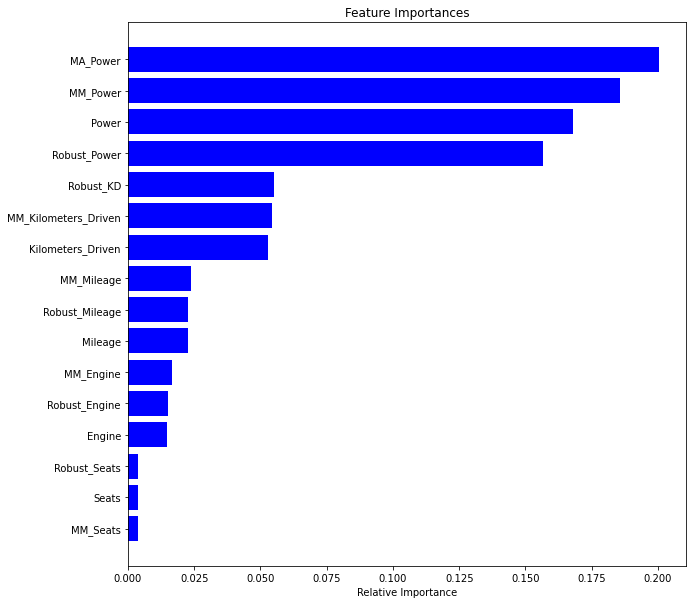

In [ ]:
plotFeatureImportances(randomForestModel)

### Check distribution of target variable

We should check the distribution of the target variable in a regression problem using distribution plot. If it is skewed then application of log, exponent or sqrt transform can help in reducing the skewness to get a normal distribution.

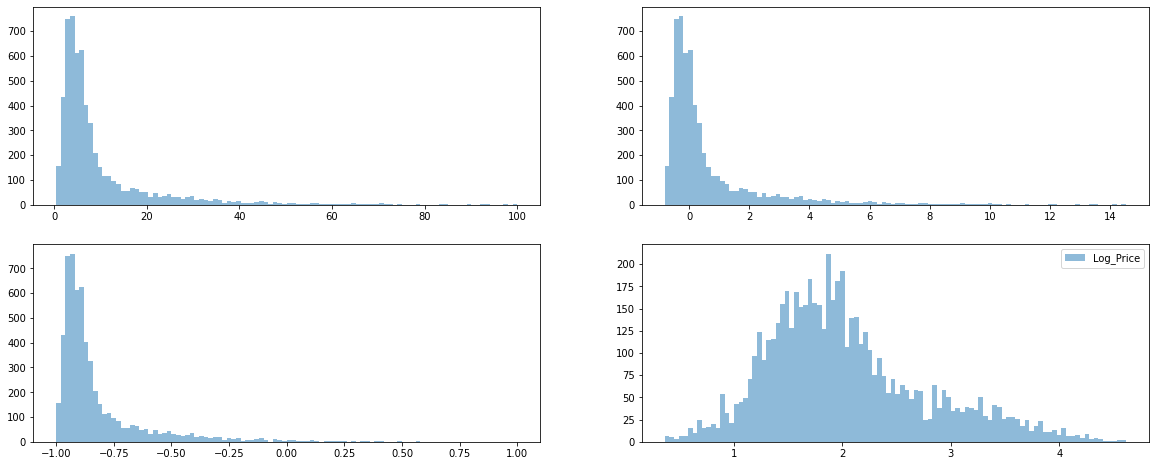

In [ ]:
fig,ax = plt.subplots(nrows=2, ncols=2,figsize=(20,8))
ax[0,0].hist(df['Price'],bins=100,alpha=0.5, label='Price')
ax[0,1].hist(df['Robust_Price'],bins=100,alpha=0.5, label='R_Price')
ax[1,0].hist(df['MM_Price'],bins=100,alpha=0.5, label='MM_Price')
ax[1,1].hist(np.log1p(df["Price"]),bins=100,alpha=0.5, label='Log_Price')
plt.legend()
plt.show()

## Log Transformation

In [ ]:
from sklearn.model_selection import train_test_split
X =  df[df.columns.difference(['Name','Price','MM_Price','Location','Year','Fuel_Type','Transmission','Owner_Type','Robust_Price'])]
y = np.log1p(df["Price"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [ ]:
randomForestModel = RandomForestRegressorModel(X,y)

R Squared(Accuracy) 0.8456793854342743
Mean Absolute Error: 0.21269288487577825
Mean Squared Error: 0.08522446296190488
Root Mean Squared Error: 0.2919322917422889
Root Mean Squared Log Error 0.09906300429120905
None


                      importance
Power                   0.201764
MM_Power                0.181749
Robust_Power            0.177649
MA_Power                0.167243
MM_Kilometers_Driven    0.042630
Kilometers_Driven       0.039682
Robust_KD               0.039505
Robust_Mileage          0.032656
Mileage                 0.029889
MM_Mileage              0.029653
MM_Engine               0.017371
Robust_Engine           0.016448
Engine                  0.015058
Robust_Seats            0.003462
Seats                   0.002804
MM_Seats                0.002438


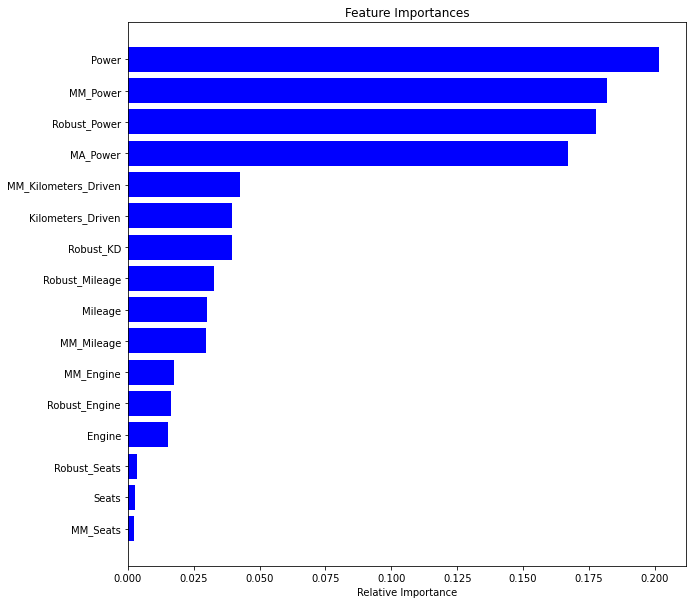

In [ ]:
plotFeatureImportances(randomForestModel)

The distribution of numerical features can be checked using a histogram plot while the distribution on categorical features can be checked using a bar plot or box plot.

In case of categorical features check if any of the column values can be combined together while in case of numerical features check if distribution can be normalized i.e. evenly distributed.

In [ ]:
df["Year"].value_counts()

2014    792
2015    738
2016    735
2013    637
2017    584
2012    555
2011    450
2010    330
2018    297
2009    189
2008    159
2007    105
2019     99
2006     66
2005     42
2004     25
2003     14
2002     11
2000      4
2001      4
1998      3
1999      2
Name: Year, dtype: int64

In categorical features and clubb together last less value valued data

You can find histograms of numerical features in the jupyter notebook and make necessary transformations if required.

## **Model application and hyper-parameter tuning**

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. The two common approaches to do hyperparameter tuning are GridSearchCV and RandomisedSearchCV.

Although GridSearchCV is exhaustive, RandomisedSearchCV is helpful to get a range of relevant values quickly.

In [ ]:
# Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit, train_test_split 
from sklearn.ensemble import RandomForestRegressor 

# Number of trees in random forest
n_estimators = [644]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'max_features': max_features,
               'bootstrap': bootstrap,
               'n_estimators': n_estimators
              }
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# Fit the random search model

def RandomizedSearchCVRandomForestRegressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    estimator = RandomForestRegressor()
    cv = ShuffleSplit(n_splits=5, random_state=42, test_size=0.3)
    n_jobs=4
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = 8)
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_)
    y_pred = rf_random.best_estimator_.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf_random.best_estimator_))
    return rf_random.best_estimator_

In [ ]:
randomForestRegressorModel2 = RandomizedSearchCVRandomForestRegressor(X,y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:   29.7s finished


{'n_estimators': 644, 'max_features': 'auto', 'bootstrap': True}
R Squared(Accuracy) 0.8480539968223175
Mean Absolute Error: 0.21087551354126183
Mean Squared Error: 0.08391306991918851
Root Mean Squared Error: 0.2896775274666444
Root Mean Squared Log Error 0.09820944404361752
None


A similar approach can be applied for ExtraTrees and XGBoost Regressor Models.

# **Stacking**

## Simplest Stacking approach : Averaging base models

We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse 

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [ ]:
averaged_models = AveragingModels(models = (grid_search_gbr.best_estimator_,xgb_grid.best_estimator_, grid_search.best_estimator_))

In [ ]:
averaged_models.fit(X,Y)
from sklearn.metrics import r2_score
print("R2-Score")
print(round(r2_score(Y_Val, averaged_models.predict(X_Val)),4))

## Less simple Stacking : Adding a Meta-model

In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:

* Split the total training set into two disjoint sets (here train and .holdout )

* Train several base models on the first part (train)

* Test these base models on the second part (holdout)

* Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler

In [ ]:
#Lasso Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
#Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (grid_search_gbr.best_estimator_,xgb_grid.best_estimator_, grid_search.best_estimator_),
                                                 meta_model = lasso)

stacked_averaged_models.fit(X.values,Y.values)
print("R2-Score")
print(round(r2_score(Y_Val.values, stacked_averaged_models.predict(X_Val.values)),4))